<a href="https://colab.research.google.com/github/Inemesitido98/LOAN-ANALYSIS/blob/main/Loan_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
loan_data= pd.read_csv(r"C:\Users\Inemesit Ido\Desktop\projects\loan analysis assignment\Loan Prediction data.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Check if there are any null values in the  column
null_totalcharges = loan_data[['Dependents','Gender', 'Married', 'Self_Employed', 'Credit_History','LoanAmount','Loan_Amount_Term']]
for column in null_totalcharges:
    sum_columns= null_totalcharges[column].isnull().sum()
    print (f'The total null values in {column} column is: {sum_columns}')


The total null values in Dependents column is: 15
The total null values in Gender column is: 13
The total null values in Married column is: 3
The total null values in Self_Employed column is: 32
The total null values in Credit_History column is: 50
The total null values in LoanAmount column is: 22
The total null values in Loan_Amount_Term column is: 14


In [ ]:
# Checking the data type of the dependents column
loan_data['Dependents'].dtype

dtype('O')

In [ ]:
# Working on missing values of categorical columns
categorical_columns= ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_columns:
    loan_data[col].fillna(loan_data[col].mode()[0], inplace= True)

numerical_columns= ['Credit_History', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_columns:
    loan_data[col].fillna(loan_data[col].median(), inplace= True)

# Verify that there is no missing value
print(loan_data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\Inemesit Ido\AppData\Local\Temp\ipykernel_13692\1982539867.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data[col].fillna(loan_data[col].mode()[0], inplace= True)
C:\Users\Inemesit Ido\AppData\Local\Temp\ipykernel_13692\1982539867.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [ ]:
# Identification of Duplicates
duplicates= loan_data.duplicated()

# Count of the duplicated rows
num_duplicates= duplicates.sum()

# Print duplicated rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


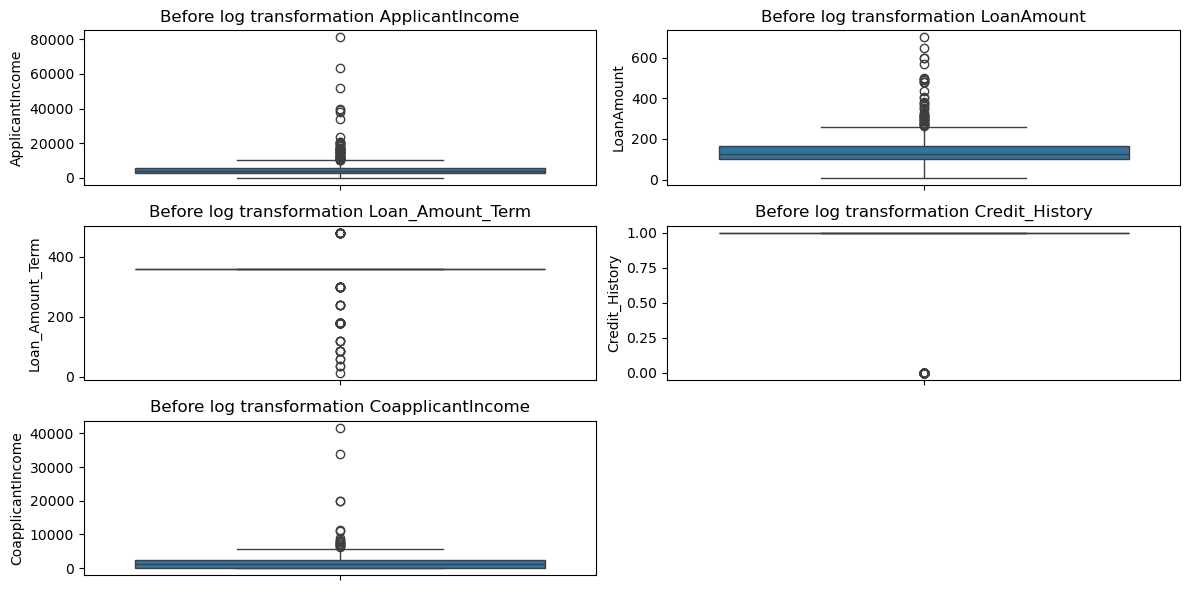

In [ ]:
# Identifying outliers
# Plot boxplots for numerical columns
num_cols= loan_data[['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History','CoapplicantIncome']]
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=loan_data[col])
    plt.title(f'Before log transformation {col}')
plt.tight_layout()
plt.show()

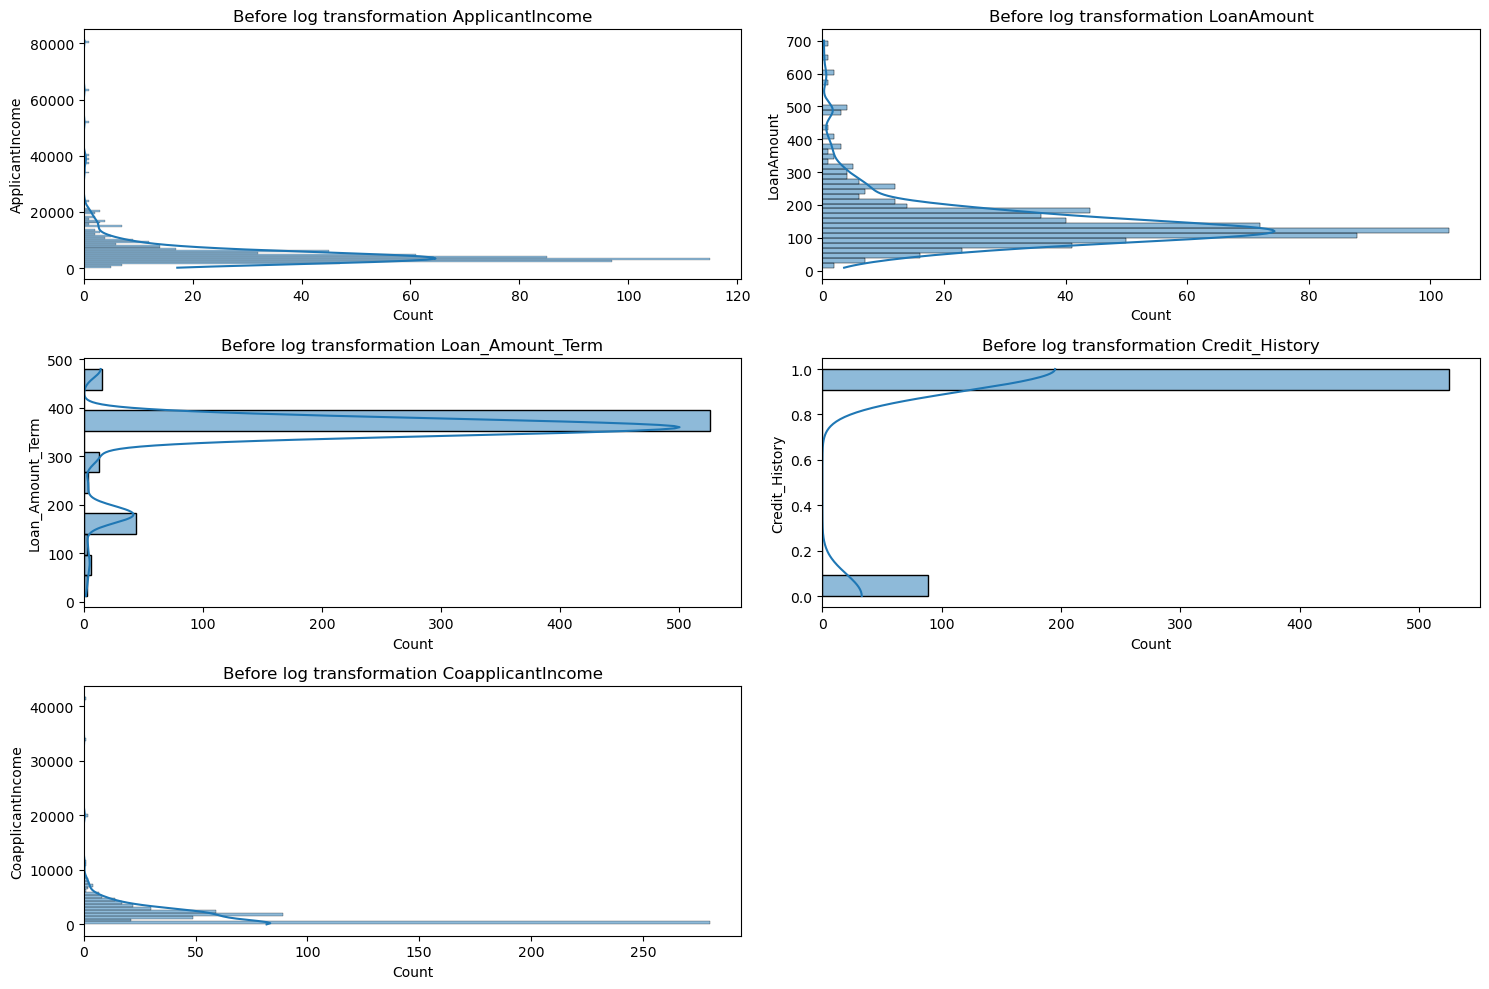

In [ ]:
# Plot histplots to understand the spread of the numerical columns
num_cols= ['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History','CoapplicantIncome']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(y=loan_data[col], kde= True)
    plt.title(f'Before log transformation {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Apply log transformation to reduce skewness
num_columns= ['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History','CoapplicantIncome']
for col in num_columns:
    loan_data[col] = loan_data[col].apply(lambda x: np.log(x + 1))  # Add 1 to avoid log(0)

# View the data after log transformation
print("Data after log transformation:")
print(loan_data)

Data after log transformation:
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           8.674197           

In [ ]:
loan_data.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674197,0.000000,4.859812,5.888878,0.693147,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,0.693147,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,0.693147,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,0.693147,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,0.693147,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,8.597482,8.342125,5.590987,5.888878,0.693147,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,7.755339,7.324490,4.564348,5.888878,0.693147,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,8.018625,7.826044,5.068904,5.888878,0.000000,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,8.295798,7.331060,5.129899,5.888878,0.693147,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,9.460476,9.302828,5.857933,5.888878,0.693147,Semiurban,N


# Feature engineering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Coverting target categorical variable to numerical value
loan_data['Loan_Status']= loan_data['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
# Checking the number of dependents that were 3+
extra_dependent= loan_data[loan_data['Dependents']== '3+']
extra_dependent


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,8.018625,7.826044,5.068904,5.888878,0.000000,Semiurban,0
34,LP001100,Male,No,3+,Graduate,No,9.433564,8.006701,5.771441,5.888878,0.693147,Rural,0
61,LP001206,Male,Yes,3+,Graduate,No,8.016318,0.000000,4.605170,5.888878,0.693147,Urban,1
68,LP001238,Male,Yes,3+,Not Graduate,Yes,8.867991,0.000000,4.836282,4.110874,0.693147,Urban,1
73,LP001250,Male,Yes,3+,Not Graduate,No,8.467162,0.000000,4.564348,5.888878,0.000000,Semiurban,0
74,LP001253,Male,Yes,3+,Graduate,Yes,8.569216,7.481556,5.236442,5.888878,0.693147,Semiurban,1
78,LP001263,Male,Yes,3+,Graduate,No,8.060856,8.294300,5.198497,5.707110,0.000000,Semiurban,0
79,LP001264,Male,Yes,3+,Not Graduate,Yes,8.111928,7.681099,4.875197,5.888878,0.693147,Semiurban,1
109,LP001384,Male,Yes,3+,Not Graduate,No,7.636270,6.626718,4.553877,6.175867,0.693147,Semiurban,1
126,LP001448,Male,Yes,3+,Graduate,No,10.077609,0.000000,5.916202,5.888878,0.693147,Rural,1


In [ ]:
# CHECKING FOR MULTICLASS COLUMNS AND BINARY COLUMNS
group_columns= ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
# Get the unique group keys
for column in group_columns:
    print(f"Grouping by {column}:")
    groupings= loan_data.groupby(column)
    # Iterate through each group and print group name and data
    for name, data in groupings :
        print(f"Group: {name}")
        #print(data.head())  # Print the first few rows of each group
    print('\n')

Grouping by Gender:
Group: Female
Group: Male


Grouping by Married:
Group: No
Group: Yes


Grouping by Education:
Group: Graduate
Group: Not Graduate


Grouping by Self_Employed:
Group: No
Group: Yes


Grouping by Property_Area:
Group: Rural
Group: Semiurban
Group: Urban


Grouping by Loan_Status:
Group: 0
Group: 1




In [ ]:
# Applying one-hot encoding to multiple columns with nominal data
loan_data_updated = pd.get_dummies(loan_data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']) #drop_first=True)

# Check the new columns after encoding
print(loan_data_updated.head())

# Check the columns and types again
print(loan_data_updated.dtypes)

    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001002         8.674197           0.000000    4.859812          5.888878   
1  LP001003         8.430327           7.319202    4.859812          5.888878   
2  LP001005         8.006701           0.000000    4.204693          5.888878   
3  LP001006         7.857094           7.765993    4.795791          5.888878   
4  LP001008         8.699681           0.000000    4.955827          5.888878   

   Credit_History  Loan_Status  Gender_Female  Gender_Male  Married_No  ...  \
0        0.693147            1          False         True        True  ...   
1        0.693147            0          False         True       False  ...   
2        0.693147            1          False         True       False  ...   
3        0.693147            1          False         True       False  ...   
4        0.693147            1          False         True        True  ...   

   Education_Not Graduate  Self_Employ

In [ ]:
# Converting boolean type to integer type
bool_cols= loan_data_updated.select_dtypes(include= ['bool']).columns
loan_data_updated[bool_cols]= loan_data_updated[bool_cols].astype(int)

#Printing updated data types of columns
print(loan_data_updated.dtypes)


Loan_ID                     object
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Gender_Female                int32
Gender_Male                  int32
Married_No                   int32
Married_Yes                  int32
Education_Graduate           int32
Education_Not Graduate       int32
Self_Employed_No             int32
Self_Employed_Yes            int32
Property_Area_Rural          int32
Property_Area_Semiurban      int32
Property_Area_Urban          int32
Dependents_0                 int32
Dependents_1                 int32
Dependents_2                 int32
Dependents_3+                int32
dtype: object


In [ ]:
loan_data['Total_Applicant_Income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income
0,LP001002,Male,No,0,Graduate,No,8.674197,0.000000,4.859812,5.888878,0.693147,Urban,1,8.674197
1,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,0.693147,Rural,0,15.749530
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,0.693147,Urban,1,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,0.693147,Urban,1,15.623087
4,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,0.693147,Urban,1,8.699681


# Exploratory Data Analysis

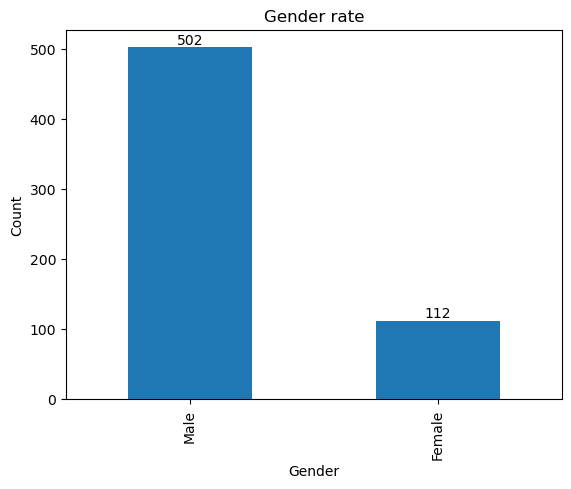

In [ ]:
# Gender rate of customers who collected loan
gender_count= loan_data['Gender'].value_counts()

# Plotting the bar chart of the gender rate by loan status
ax= gender_count.plot(kind= 'bar', title= 'Gender rate')
plt.xlabel('Gender')
plt.ylabel('Count')

for loan in ax.patches:  # 'ax.patches' contains all the bars in the plot
    ax.text(loan.get_x() + loan.get_width() / 2,    # X-coordinate: center of the bar
            loan.get_height(),                   # Y-coordinate: height of the bar
            str(int(loan.get_height())),         # Text to display (height of the bar as integer)
            ha='center',                      # Center alignment horizontally
            va='bottom',                      # Bottom alignment vertically (text above the bar)
            fontsize=10,                      # Font size of the text
            color='black')                    # Text color

# Show the plot
plt.show()

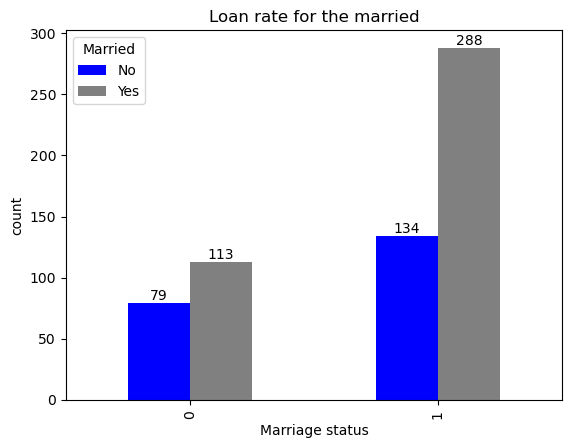

In [ ]:
# Married rate of customers who collected loan
# Grouping married column by loan status
married = loan_data.groupby(["Loan_Status", "Married"]).size().unstack()

# Plotting a bar chart to show the married by loan status
ax1 = married.plot(kind='bar', title='Loan rate for the married', color=['blue', 'grey'])
plt.xlabel('Marriage status')
plt.ylabel('count')

# Calculating the total number of married by loan status
for loans in ax1.patches:
    ax1.text(
        loans.get_x() + loans.get_width() / 2,
        loans.get_height(),
        str(int(loans.get_height())),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
# Show plot
plt.show()

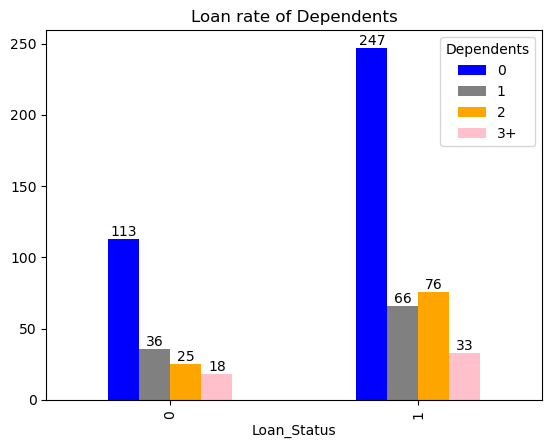

In [ ]:
# Dependents rate of customers who collected loan
# Grouping dependents by loan status
dependents= loan_data.groupby(["Loan_Status", "Dependents"]).size().unstack()

# Plotting a bar chart to show loan status of dependents
ax2= dependents.plot(kind= 'bar', title= 'Loan rate of Dependents', color= ['blue', 'grey', 'orange', 'pink'])

# Calculating the total number of dependents based on loan status
for loans in ax2.patches:
    ax2.text(loans.get_x() + loans.get_width() / 2,
             loans.get_height(),
             str(int(loans.get_height())),
             ha= 'center',
             va= 'bottom',
             color= 'black'
            )


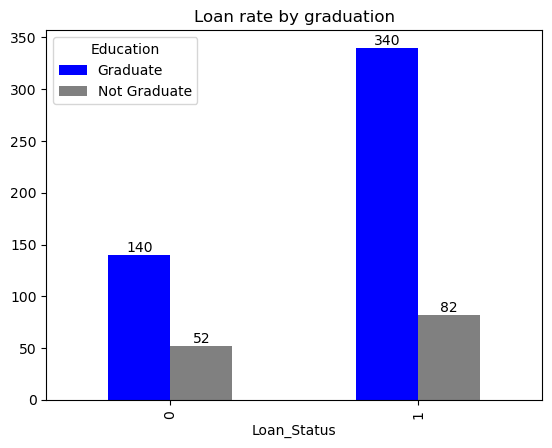

In [ ]:
# Education rate of customers who collected loan
# Grouping Education by loan status
Education= loan_data.groupby(["Loan_Status", "Education"]).size().unstack()

# Plotting bar chart for Education by loan status
ax5= Education.plot(kind='bar', title= 'Loan rate by graduation', color= ['blue','grey'])

# Calculating Education by loan status
for loans in ax5.patches:
    ax5.text(loans.get_x() + loans.get_width() / 2,
             loans.get_height(),
             str(int(loans.get_height())),
             ha= 'center',
             va= 'bottom',
             color= 'black'
            )


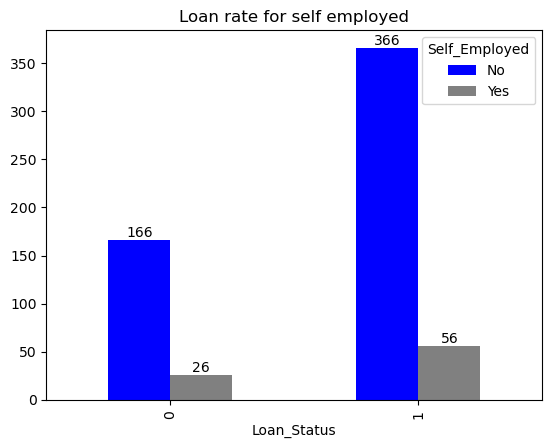

In [ ]:
# Self-employed rate of customers who collected loan
# Grouping the self-employed column by loan status
self_employed= loan_data.groupby(["Loan_Status", "Self_Employed"]).size().unstack()

# Plotting bar chart for self-employed by loan status
ax3= self_employed.plot(kind='bar', title= 'Loan rate for self employed', color= ['blue','grey'])

# Calculating self-employed by loan status
for loans in ax3.patches:
    ax3.text(loans.get_x() + loans.get_width() / 2,
             loans.get_height(),
             str(int(loans.get_height())),
             ha= 'center',
             va= 'bottom',
             color= 'black'
            )

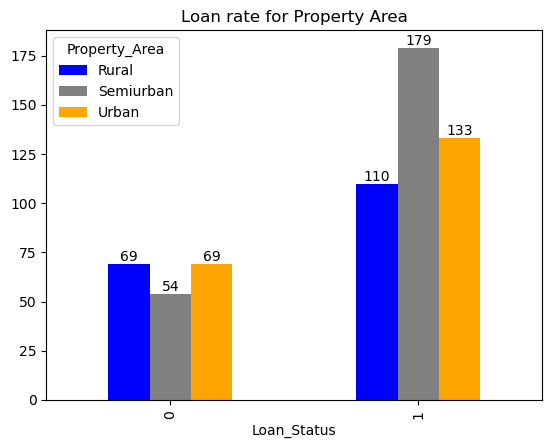

In [ ]:
# Property area rate of customers who collected loan
# Grouping the property area column by loan status
Property_Area= loan_data.groupby(["Loan_Status", "Property_Area"]).size().unstack()

# Ploting bar chart for property area by loan status
ax4= Property_Area.plot(kind='bar', title= 'Loan rate for Property Area', color= ['blue','grey', 'orange'])

# Calculating the property area by loan status
for loans in ax4.patches:
    ax4.text(loans.get_x() + loans.get_width() / 2,
             loans.get_height(),
             str(int(loans.get_height())),
             ha= 'center',
             va= 'bottom',
             color= 'black'
            )

In [ ]:
# Displaying information about each column in the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    object 
 2   Married                 614 non-null    object 
 3   Dependents              614 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           614 non-null    object 
 6   ApplicantIncome         614 non-null    float64
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Loan_Amount_Term        614 non-null    float64
 10  Credit_History          614 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status             614 non-null    int64  
 13  Total_Applicant_Income  614 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory 

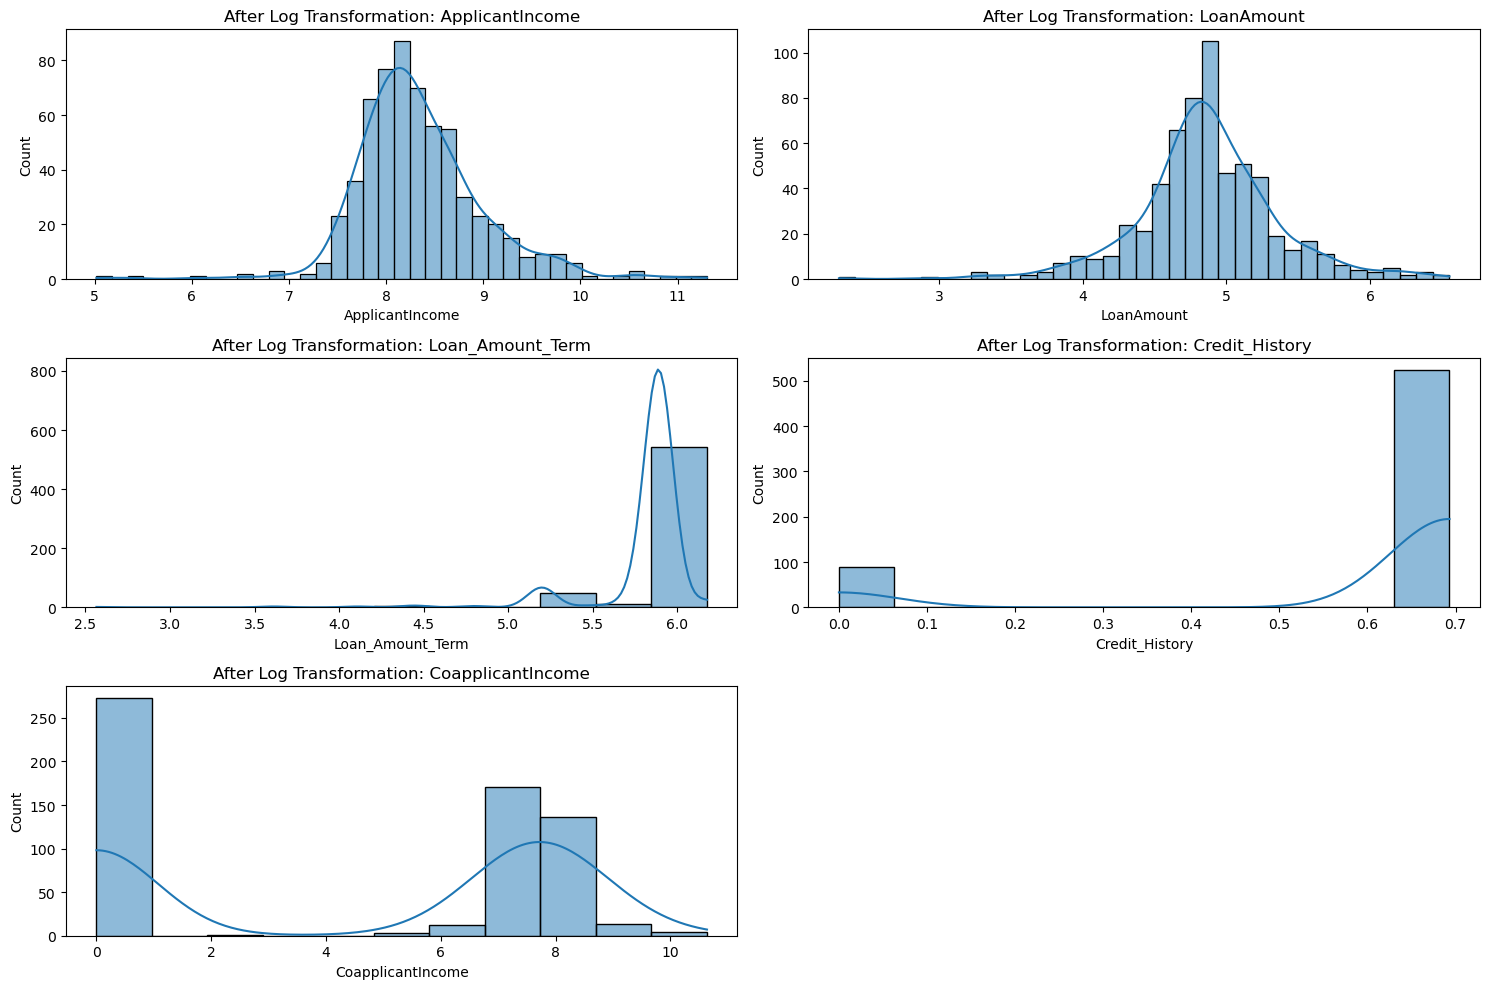

In [ ]:
# Plot histograms after log transformation
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(loan_data[col], kde=True)
    plt.title(f'After Log Transformation: {col}')
plt.tight_layout()
plt.show()

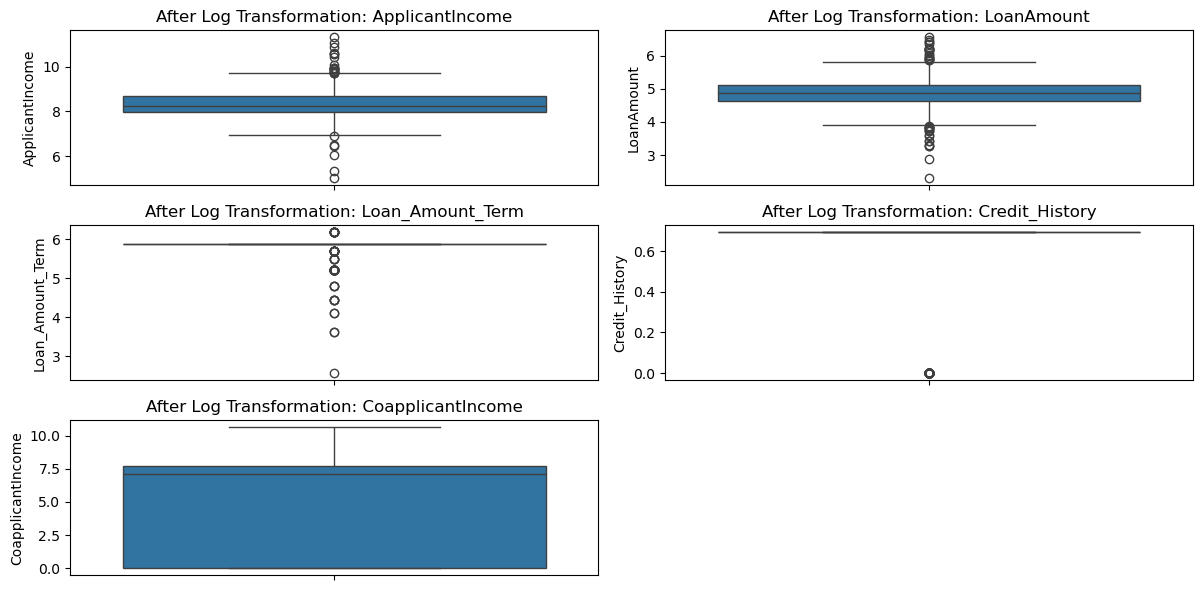

In [ ]:
# Plot noxplots after log transformation
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=loan_data[col])
    plt.title(f'After Log Transformation: {col}')
plt.tight_layout()
plt.show()

# Probability and Statistics for Machine learning

## Descriptive Statistics

In [ ]:
# Calculating mean, mode, median, standard deviation and variance
mean_loan= loan_data['LoanAmount'].mean()
mode_loan= loan_data['LoanAmount'].mode()[0]
median_loan= loan_data['LoanAmount'].median()
std_loan= loan_data['LoanAmount'].std()
var_loan= loan_data['LoanAmount'].var()

#Printing them
print(f'The mean is {mean_loan}')
print(f'The mode is {mode_loan}')
print(f'The median is {median_loan}')
print(f'The standard deviation is {std_loan}')
print(f'The variance is {var_loan}')

The mean is 4.866091231157082
The mode is 4.859812404361672
The median is 4.859812404361672
The standard deviation is 0.49081053496264954
The variance is 0.24089498123032224


## Probabality Distributions

<function matplotlib.pyplot.show(close=None, block=None)>

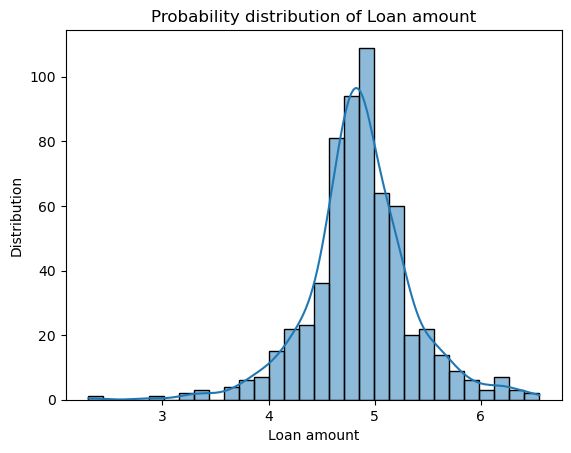

In [ ]:
# Plotting a histogram to show the distribution of amount of loan
sns.histplot(loan_data['LoanAmount'], kde= True, bins= 30)
plt.xlabel('Loan amount')
plt.ylabel('Distribution')
plt.title('Probability distribution of Loan amount')
plt.show

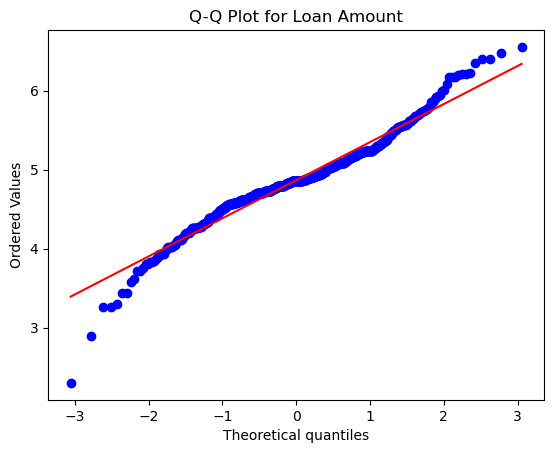

In [ ]:
# Q-Q plot to check for normality
from scipy.stats import probplot
probplot(loan_data['LoanAmount'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Loan Amount')
plt.show()


## Correlation and Hypothesis testing

### Correlation

Correlation matrix:
                    ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.368258    0.492819
CoapplicantIncome        -0.368258           1.000000    0.132697
LoanAmount                0.492819           0.132697    1.000000


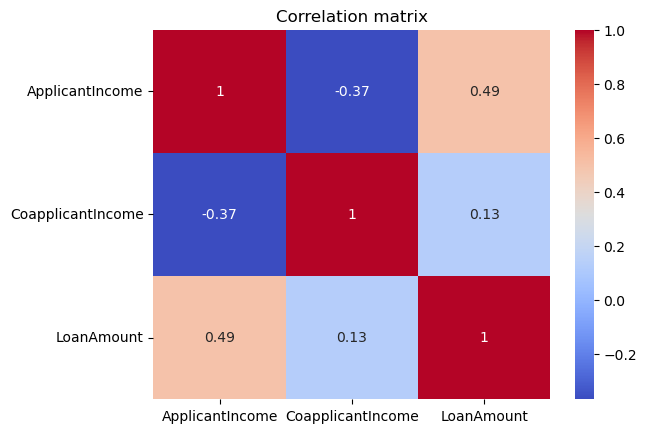

In [ ]:
# Computing correlation
correlation_matrix= loan_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].corr()
print('Correlation matrix:\n', correlation_matrix)

sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.title('Correlation matrix')
plt.show()

### Hypothesis testing

In [ ]:
pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pingouin as pg
expected, observed, stats = pg.chi2_independence(data=loan_data, x="Gender", y="Loan_Status")
# Print results
test_results= stats[stats['test'] == 'pearson']
print(test_results)

      test  lambda      chi2  dof      pval    cramer     power
0  pearson     1.0  0.110879  1.0  0.739146  0.013438  0.062796


In [ ]:
# Interpret the p-value
alpha = 0.05
p_value = test_results['pval'].values[0]
if p_value < alpha:
    print("\nReject the null hypothesis: Loan approval rate is dependent on applicant gender.")
else:
    print("\nFail to reject the null hypothesis: Loan approval rate is independent of applicant gender.")


Fail to reject the null hypothesis: Loan approval rate is independent of applicant gender.


## MACHINE LEARNING MODEL BUILDING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
loan_data_updated.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,8.674197,0.000000,4.859812,5.888878,0.693147,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
1,LP001003,8.430327,7.319202,4.859812,5.888878,0.693147,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,LP001005,8.006701,0.000000,4.204693,5.888878,0.693147,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0
3,LP001006,7.857094,7.765993,4.795791,5.888878,0.693147,1,0,1,0,...,1,1,0,0,0,1,1,0,0,0
4,LP001008,8.699681,0.000000,4.955827,5.888878,0.693147,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
# Dropping columns that are not needed
loan_data_updated.drop('Loan_ID', axis= 1, inplace= True)

In [ ]:
# Dropping loan status
X= loan_data_updated.drop('Loan_Status', axis= 1)
y= loan_data_updated['Loan_Status'].values.ravel()

# After train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Scale only the numeric columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [ ]:
loan_data_updated.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,8.674197,0.000000,4.859812,5.888878,0.693147,1,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
1,8.430327,7.319202,4.859812,5.888878,0.693147,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
2,8.006701,0.000000,4.204693,5.888878,0.693147,1,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0
3,7.857094,7.765993,4.795791,5.888878,0.693147,1,0,1,0,1,...,1,1,0,0,0,1,1,0,0,0
4,8.699681,0.000000,4.955827,5.888878,0.693147,1,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
# Using Logisitic Regression
# Fit model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'The accuracy score of the Logistic Regression is {accuracy:.2f}')
print(classification_report(y_test, y_pred))


The accuracy score of the Logistic Regression is 0.79
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (491, 20)
y_train shape: (491,)
X_test shape: (123, 20)
y_test shape: (123,)


# CONCLUSION

# Exploratory data analysis interpretations
- Married people carried loans more than singles
- Loan rates were more  prevalent in the semi-urban areas
- Graduates collected more loans than non-graduates
- Non-self-employed people collected loans compared to the self-employed
- The male gender collected loans more than the females.

## Descriptive Statistics of Loan Amounts
I was able to uncover a few basic statistics:

- **Mean**: 4.87

- **Mode**: 4.86

- **Median**: 4.86

- **Standard Deviation**: 0.49

- **Variance**: 0.24

### Interpretation
- The mean, median, and mode are almost the same, which means the loan amounts are quite balanced and not skewed in any direction.

- The low standard deviation and variance show that most loan amounts are close to the average (not much variation).

 In summary, the loan amounts in this dataset are fairly consistent with no major outliers. Major outliers were reduced by carrying out log transformation. This helped in getting a clearer view of the overall distribution of the dataset.



## Hypothesis Testing: Does Gender Affect Loan Approval?
I conducted a hypothesis test to examine whether there is a relationship between an applicant's gender and their loan approval status.

### Hypotheses
- **Null Hypothesis (H₀)**: Loan approval is independent of applicant gender.

- **Alternative Hypothesis (H₁)**: Loan approval is dependent on applicant gender.

### Test Details
**Significance Level (α)**: 0.05

**p-value**: 0.739146

### Conclusion
Since the p-value is greater than the significance level (p > 0.05), we fail to reject the null hypothesis.

#### Interpretation:
There is no statistically significant association between applicant gender and loan approval rate. Based on the available data, gender does not appear to influence the likelihood of a loan being approved.



## Model Interpretation

- The model performs well overall with a 79% accuracy.

- It predicts approved loans (Class 1) much better than rejected ones (Class 0), with high recall for approvals (0.99), but struggles to correctly identify rejections (low recall of 0.42).

- This indicates a potential class imbalance or that the model favors predicting approvals.